**Дарья Касьяненко**

* Эксперт [Центра непрерывного образования](https://cs.hse.ru/dpo/) ФКН НИУ ВШЭ 
* Академический руководитель онлайн-магистратуры «[Инженерия данных](https://www.hse.ru/ma/data-engineering/)»
* Старший преподаватель ФКН НИУ ВШЭ

<hr>

# Завершим день 1. Цикл for

Проанализиуем расходы за год:
   * Есть список, где за каждый из 12 месяцев записана сумма расходов
   * Необходимо с помощью цикла найти сумму расходов

In [1]:
summ = [30000, 120000, 70000, 90000, 40000, 45000, 51000, 68000, 95000, 39000, 99000, 23000]

In [2]:
final = 0
for s in summ:
    final += s
print(final)

770000


Немного изменим условие:
   * Будем выводить номера месяцев, для которых расходы превысили 50000

In [3]:
for i in range(len(summ)):
    if summ[i] > 50000:
        print(i+1)

2
3
4
7
8
9
11


# День 2. Работаем с таблицами и идем на свидание (с Python)

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('dates.csv')

`df` – это название переменной, в которой будет храниться наша таблица. \
`pd.read_csv()` – это вызов функции, которая умеет считывать файлы csv и преобразовывать их в объект DataFrame (мы часто будем называть наши таблицы датафреймами). \
`'dates.csv'` – это название нашего файла, с которым будем работать. Важно, чтобы он лежал в той же папке, что и эта тетрадка .ipynb.

Посмотрим на датафрейм:

In [7]:
df.head() # первые пять строк таблицы

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
0,female,21,27,Law,35.0,20.0,20.0,20.0,0.0,5.0,...,8,1,3,2,4,7.0,0,1,0,0
1,female,21,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,...,8,1,3,2,4,7.0,1,1,0,0
2,female,21,23,Law,30.0,5.0,15.0,40.0,5.0,5.0,...,8,1,3,2,4,7.0,0,1,1,1
3,female,21,24,Law,30.0,10.0,20.0,10.0,10.0,20.0,...,8,1,3,2,4,6.0,0,1,1,1
4,female,21,25,Law,50.0,0.0,30.0,10.0,0.0,10.0,...,8,1,3,2,4,6.0,0,0,1,0


In [8]:
df.tail() # последние пять строк таблицы

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
1043,male,19,20,Computer Science,15.0,15.0,20.0,25.0,10.0,15.0,...,5,3,5,0,0,5.0,0,0,0,0
1044,male,19,21,Computer Science,15.0,15.0,25.0,25.0,15.0,5.0,...,5,3,5,0,0,5.0,0,0,0,0
1045,male,19,20,Computer Science,20.0,20.0,20.0,20.0,10.0,10.0,...,5,3,5,0,0,5.0,0,0,0,0
1046,male,19,21,Computer Science,15.0,15.0,25.0,25.0,20.0,0.0,...,5,3,5,0,0,5.0,0,0,0,0
1047,male,19,20,Computer Science,10.0,10.0,35.0,35.0,8.0,2.0,...,5,3,5,0,0,5.0,0,0,0,0


In [9]:
df.sample(10) # рандомные 10 строк таблицы

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
846,male,32,30,Chemistry,20.0,25.0,15.0,15.0,15.0,10.0,...,5,2,6,18,8,4.0,0,0,0,0
130,female,27,28,Tc [Health Ed],25.0,15.0,25.0,15.0,0.0,20.0,...,8,8,4,2,2,6.0,0,1,1,1
528,female,26,22,Law,30.0,10.0,20.0,30.0,0.0,10.0,...,9,2,5,1,5,7.0,0,0,1,0
446,male,21,26,Law,20.0,25.0,20.0,15.0,15.0,5.0,...,4,2,5,1,2,6.0,0,1,0,0
866,male,26,27,Business- Mba,25.0,15.0,20.0,20.0,20.0,0.0,...,6,3,6,5,3,7.0,0,1,0,0
964,female,21,22,Economics; Sociology,40.0,15.0,10.0,20.0,5.0,10.0,...,9,3,6,4,1,8.0,1,1,0,0
561,male,22,27,Law,10.0,25.0,25.0,10.0,10.0,20.0,...,2,1,5,1,3,6.0,0,0,1,0
721,female,23,29,Social Work,50.0,7.0,20.0,23.0,0.0,0.0,...,9,3,5,10,1,6.0,0,0,0,0
775,female,29,27,International Educational Development,20.0,20.0,20.0,20.0,10.0,10.0,...,6,9,5,6,3,6.0,0,0,0,0
127,female,27,23,Tc [Health Ed],20.0,25.0,20.0,15.0,10.0,10.0,...,8,8,4,2,2,3.0,0,0,0,0


### Описание признаков

 * gender: пол
 * age: свой возраст
 * age_o: возраст партнера  
 * field: сфера занятий
 
**Раздел про важность различных качеств (нужно распределить между 5 категориями 100 баллов)**
 * pref_o_attractive: Насколько важна привлекательность?
 * pref_o_sinsere: Насколько важна искренность?
 * pref_o_intelligence: Насколько важен интеллект? 
 * pref_o_funny: Насколько важно чувство юмора?
 * pref_o_ambitious: Насколько важна амбициозность? 
 * pref_o_shared_interests: Насколько важно разделять одинаковые интересы? 
 
**Как оценили друг друга на встрече (0-10)**
 * attractive_o: Оценка привлекательности (от партнера) в вечер встречи 
 * sincere_o: Оценка искренности (от партнера) в вечер встречи
 * intelligence_o: Оценка интеллекта (от партнера) в вечер встречи 
 * funny_o: Оценка чувства юмора (от партнера) в вечер встречи 
 * ambitous_o: Оценка амбициозности (от партнера) в вечер встречи  
 * shared_interests_o: Оценка общих интересов (от партнера) в вечер встречи  
 * attractive: Оценка собственной привлекательности
 * sincere: Оценка собственной искренности   
 * intelligence: Оценка собственного интеллекта   
 * funny: Оценка собственного чувства юмора  
 * ambition: Оценка собственных амбиций
 * attractive_partner: Оценка привлекательности партнера в вечер встречи  
 * sincere_partner: Оценка искренности партнера в вечер встречи  
 * intelligence_partner: Оценка интеллекта партнера в вечер встречи   
 * funny_partner: Оценка чувства юмора партнера в вечер встречи   
 * ambition_partner: Оценка амбициозности партнера в вечер встречи   
 * shared_interests_partner: Оценка общих интересов партнера в вечер встречи  

**Оценка своих интересов в разных сферах (0-10)**
 * sports
 * tvsports  
 * exercise  
 * dining  
 * museums  
 * art  
 * hiking  
 * gaming  
 * clubbing  
 * reading  
 * tv  
 * theater  
 * movies  
 * concerts  
 * music  
 * shopping  
 * yoga   
 
**Оценка ожиданий от быстрого свидания**
 * expected_happy_with_sd_people: Насколько вы будете удовлетворены людьми, которых встретите на спид-дэйтинге? (0-10)
 * expected_num_interested_in_me: Из 20 людей, которых вы встретите на спид-дейтинге, как вы думаете, сколько будут заинтересованы пойти с вами на настоящее свидание?
 * expected_num_matches: Сколько взаимных симпатий вы ожидаете?
 
**Результаты быстрого свидания**
 * like: Понравился ли вам партнер?  
 * guess_prob_liked: Как вы думаете, вы понравились партнеру?
 * met: Вы уже встречались с этим партнером?
 * decision: Ваше решение
 * decision_o: Решение вашего партнера 
 * match: Мэтч (да/нет)

## Информация о таблице

In [10]:
df.shape  # (кол-во строк, кол-во столбцов)

(1048, 52)

In [11]:
df.info() # сводная информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         1048 non-null   object 
 1   age                            1048 non-null   int64  
 2   age_o                          1048 non-null   int64  
 3   field                          1048 non-null   object 
 4   pref_o_attractive              1048 non-null   float64
 5   pref_o_sincere                 1048 non-null   float64
 6   pref_o_intelligence            1048 non-null   float64
 7   pref_o_funny                   1048 non-null   float64
 8   pref_o_ambitious               1048 non-null   float64
 9   pref_o_shared_interests        1048 non-null   float64
 10  attractive_o                   1048 non-null   float64
 11  sinsere_o                      1048 non-null   int64  
 12  intelligence_o                 1048 non-null   f

Как прочитать таблицу выше? 
1. `<class 'pandas.core.frame.DataFrame'>` – Python видит нашу таблицу как объект DataFrame.
2. `RangeIndex: 1048 entries, 0 to 1047` – в таблице 1048 строк с индексами от 0 до 1047. В Python все считается с 0, а не 1, как мы привыкли.
3. `Data columns (total 52 columns):` – в таблице 52 колонки.
4. После выводится небольшая таблица с информацией о названии колонки (`Column`), количестве непустых ячеек в колонке (`Non-Null Count`), а также тип данных (`Dtype`). 
5. `dtypes: float64(11), int64(39), object(2)` – сводка по количеству столбцов с разными типами данных. Тип `object` – это обычная строка.
6. `memory usage: 434.1+ KB` – сколько памяти занимает таблица.

## Обращение к данным в таблице

In [13]:
df['gender'] # один столбец

0       female
1       female
2       female
3       female
4       female
         ...  
1043      male
1044      male
1045      male
1046      male
1047      male
Name: gender, Length: 1048, dtype: object

In [12]:
df.gender # или так

0       female
1       female
2       female
3       female
4       female
         ...  
1043      male
1044      male
1045      male
1046      male
1047      male
Name: gender, Length: 1048, dtype: object

In [14]:
df[['gender', 'field']] # Два столбца. Что за тип данных заключает в себя названия столбцов?

,gender,field
0,female,Law
1,female,Law
2,female,Law
3,female,Law
4,female,Law
...,...,...
1043,male,Computer Science
1044,male,Computer Science
1045,male,Computer Science
1046,male,Computer Science


In [ ]:
df.loc[0] # первая строка в таблице

In [ ]:
df.loc[999] # тысячная строка в таблице

In [17]:
df.loc[0, 'gender':'age_o'] # первая строка, значения из трех колонок

gender    female
age           21
age_o         27
Name: 0, dtype: object

<hr>

### Задание

Найдите, какой пол и сколько лет было человеку под индексом 777 в датасете, сколько лет было партнеру, из какой сферы деятельности он/а?

In [16]:
# ваш код
df.loc[777, ['gender', 'field']]

gender              male
field     Business [Mba]
Name: 777, dtype: object

<hr>

## Фильтрация данных

Операторы сравнения: 
* **==** равно
* **!=** не равно
* **\>** больше чем
* **\<** меньше чем
* **\>=** больше или равно чем
* **<=** меньше или равно чем

Операторы для нескольких условий (все условия должны быть в скобках!)
* `&` - И
* `|` - ИЛИ

In [18]:
df['gender'] == 'female' # переведет ячейки в True или False в выбранной колонке

0        True
1        True
2        True
3        True
4        True
        ...  
1043    False
1044    False
1045    False
1046    False
1047    False
Name: gender, Length: 1048, dtype: bool

In [19]:
df[df['gender'] == 'female'] # покажет строки, в которых df['gender'] == 'female'

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
0,female,21,27,Law,35.0,20.0,20.0,20.0,0.0,5.0,...,8,1,3,2,4,7.0,0,1,0,0
1,female,21,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,...,8,1,3,2,4,7.0,1,1,0,0
2,female,21,23,Law,30.0,5.0,15.0,40.0,5.0,5.0,...,8,1,3,2,4,7.0,0,1,1,1
3,female,21,24,Law,30.0,10.0,20.0,10.0,10.0,20.0,...,8,1,3,2,4,6.0,0,1,1,1
4,female,21,25,Law,50.0,0.0,30.0,10.0,0.0,10.0,...,8,1,3,2,4,6.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,female,21,21,Psychology And English,20.0,15.0,20.0,15.0,12.0,18.0,...,10,4,2,0,2,8.0,0,1,0,0
982,female,21,22,Psychology And English,25.0,40.0,15.0,10.0,5.0,5.0,...,10,4,2,0,2,9.0,0,1,0,0
983,female,21,22,Psychology And English,25.0,25.0,25.0,15.0,5.0,5.0,...,10,4,2,0,2,1.0,0,0,0,0
984,female,21,21,Psychology And English,40.0,15.0,10.0,20.0,10.0,5.0,...,10,4,2,0,2,9.0,0,1,0,0


In [ ]:
df[(df['gender'] == 'female') & (df['age'] > 25)] # все свидания, в которых участвовали девушки старше 25 лет

<hr>

### Задание

Найдите всех мужчин-бизнесменов (Business) старше 35 лет, которые оценили собственную привлекательность на 5 баллов и выше.

In [22]:
df[(df['gender'] == 'male') & (df['field'] == 'Business') & (df['age'] > 25) & (df['attractive'] >= 5)]

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
94,male,27,21,Business,15.00,20.00,20.00,15.00,15.00,15.00,...,2,1,5,2,2,7.0,0,0,0,0
95,male,27,24,Business,45.00,5.00,25.00,20.00,0.00,5.00,...,2,1,5,2,2,7.0,0,1,0,0
96,male,27,25,Business,35.00,10.00,35.00,10.00,10.00,0.00,...,2,1,5,2,2,5.0,0,0,0,0
97,male,27,23,Business,20.00,20.00,20.00,20.00,10.00,10.00,...,2,1,5,2,2,7.0,0,0,0,0
98,male,27,21,Business,20.00,5.00,25.00,25.00,10.00,15.00,...,2,1,5,2,2,6.0,0,0,1,0
99,male,27,23,Business,10.00,25.00,20.00,25.00,5.00,15.00,...,2,1,5,2,2,7.0,0,0,0,0
100,male,27,22,Business,15.00,15.00,25.00,20.00,15.00,10.00,...,2,1,5,2,2,7.0,0,1,0,0
101,male,27,25,Business,9.09,18.18,27.27,18.18,18.18,9.09,...,2,1,5,2,2,7.0,0,1,1,1
102,male,27,26,Business,20.00,10.00,20.00,30.00,10.00,10.00,...,2,1,5,2,2,7.0,0,0,1,0
790,male,26,22,Business,15.00,20.00,20.00,20.00,15.00,10.00,...,3,3,6,6,2,4.0,0,0,0,0


In [29]:
df.query('gender == "male" & field == "Business" & age >= 25 & attractive >= 5').shape

(48, 52)

<hr>

## Сортировка данных

In [24]:
df.sort_values('pref_o_funny') # сначала те, кому чувство юмора не важно в партнере

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
27,female,23,24,Law,100.0,0.0,0.0,0.0,0.0,0.0,...,1,8,1,2,2,10.0,0,1,0,0
327,male,24,27,Economics,50.0,0.0,50.0,0.0,0.0,0.0,...,2,1,3,1,0,6.0,0,0,0,0
426,male,23,27,Law,50.0,0.0,50.0,0.0,0.0,0.0,...,2,1,3,2,1,8.0,0,0,0,0
388,male,30,27,Finance&Economics,50.0,0.0,50.0,0.0,0.0,0.0,...,2,1,8,6,5,6.0,0,1,0,0
398,male,22,27,Undergrad - Gs,50.0,0.0,50.0,0.0,0.0,0.0,...,6,2,6,5,2,4.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,female,26,22,Masters In Public Administration,60.0,0.0,0.0,40.0,0.0,0.0,...,8,3,6,15,1,10.0,0,1,1,1
19,female,23,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,...,1,8,1,2,2,8.0,1,0,0,0
11,female,24,23,Law,30.0,5.0,15.0,40.0,5.0,5.0,...,3,1,4,5,3,7.0,0,1,1,1
51,female,26,23,Masters In Public Administration,30.0,5.0,15.0,40.0,5.0,5.0,...,8,3,6,15,1,7.0,0,1,1,1


In [25]:
df.sort_values('pref_o_funny', ascending=False) # сначала те, кому чувство юмора важно

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,...,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
51,female,26,23,Masters In Public Administration,30.0,5.0,15.0,40.0,5.0,5.0,...,8,3,6,15,1,7.0,0,1,1,1
19,female,23,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,...,1,8,1,2,2,8.0,1,0,0,0
29,female,23,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,...,1,1,4,3,4,7.0,0,1,0,0
31,female,23,23,Law,30.0,5.0,15.0,40.0,5.0,5.0,...,1,1,4,3,4,9.0,0,1,1,1
39,female,22,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,...,10,10,7,3,2,7.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,male,23,27,Law,50.0,0.0,50.0,0.0,0.0,0.0,...,5,1,7,5,2,8.0,0,0,0,0
409,male,25,27,Mathematical Finance,50.0,0.0,50.0,0.0,0.0,0.0,...,2,7,6,4,4,6.0,0,1,0,0
359,male,28,27,Finance,50.0,0.0,50.0,0.0,0.0,0.0,...,6,3,7,7,9,7.0,0,1,0,0
471,male,28,27,Mba,50.0,0.0,50.0,0.0,0.0,0.0,...,1,3,7,5,2,7.0,0,1,0,0


<hr>

### Задание

Выведите информацию о первых 10 женщинах, которые занимаются правом (Law), любят заниматься шопингом (оценка 5 и выше), ожидают не менее 2 мэтчей от свидания – от наиболее привлекательной (по оценке партнера) до наименее привлекательной (по оценке партнера).

In [30]:
pd.set_option('display.max_columns', 52) # чтобы все колонки показывались в выводе

In [31]:
df.head()

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
0,female,21,27,Law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8,8.0,8.0,8,6.0,6,8,8,8,7,6,9,7,7,6,5,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,7.0,0,1,0,0
1,female,21,22,Law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8,10.0,7.0,7,5.0,6,8,8,8,7,7,8,7,8,5,6,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,7.0,1,1,0,0
2,female,21,23,Law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8,9.0,8.0,9,8.0,6,8,8,8,7,7,6,8,7,6,8,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,7.0,0,1,1,1
3,female,21,24,Law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7,9.0,6.0,9,7.0,6,8,8,8,7,5,6,7,7,6,6,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,6.0,0,1,1,1
4,female,21,25,Law,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7,8.0,8.0,7,7.0,6,8,8,8,7,4,9,7,4,6,4,9,2,8,9,1,1,5,1,5,6,9,1,10,10,9,8,1,3,2,4,6.0,0,0,1,0


In [36]:
df.query('gender == "female" & field == "Law" & shopping >= 5 & expected_num_matches >= 2'
        ).sort_values('attractive_o', ascending=False).head(10)

,gender,age,age_o,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,met,decision,decision_o,match
529,female,26,25,Law,30.0,0.0,30.0,30.0,10.0,0.0,10.0,9,9.0,9.0,7,8.0,9,9,9,9,9,6,8,8,7,7,8,8,5,7,8,6,6,7,7,7,7,3,2,9,7,9,9,2,5,1,5,7.0,0,1,1,1
525,female,26,22,Law,20.0,15.0,20.0,20.0,5.0,10.0,10.0,10,10.0,10.0,10,10.0,9,9,9,9,9,8,9,9,9,8,8,8,5,7,8,6,6,7,7,7,7,3,2,9,7,9,9,2,5,1,5,8.0,1,1,1,1
40,female,22,22,Law,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10,10.0,10.0,10,10.0,6,6,5,7,7,3,6,8,7,8,8,5,3,4,10,10,10,2,3,8,8,8,10,10,10,10,10,10,7,3,2,7.0,1,0,1,0
46,female,22,28,Law,50.0,0.0,25.0,10.0,0.0,15.0,9.0,7,9.0,9.0,9,10.0,6,6,5,7,7,6,6,8,8,8,6,5,3,4,10,10,10,2,3,8,8,8,10,10,10,10,10,10,7,3,2,6.0,0,1,1,1
205,female,24,28,Law,25.0,15.0,25.0,15.0,0.0,20.0,9.0,8,8.0,7.0,8,6.0,8,8,9,8,9,4,5,7,3,6,4,3,3,7,10,7,7,7,2,6,6,8,8,8,6,7,10,6,5,4,3,5.0,0,0,1,0
206,female,24,26,Law,20.0,35.0,20.0,10.0,10.0,5.0,9.0,6,7.0,6.0,7,8.0,8,8,9,8,9,9,6,7,7,6,5,3,3,7,10,7,7,7,2,6,6,8,8,8,6,7,10,6,5,4,3,7.0,0,0,1,0
524,female,26,29,Law,20.0,25.0,15.0,15.0,53.0,20.0,9.0,8,8.0,8.0,7,5.0,9,9,9,9,9,6,7,7,7,8,6,8,5,7,8,6,6,7,7,7,7,3,2,9,7,9,9,2,5,1,5,6.0,0,0,1,0
204,female,24,24,Law,25.0,15.0,25.0,25.0,15.0,15.0,9.0,7,7.0,6.0,7,7.0,8,8,9,8,9,4,6,7,5,8,5,3,3,7,10,7,7,7,2,6,6,8,8,8,6,7,10,6,5,4,3,5.0,0,0,1,0
212,female,24,23,Law,20.0,25.0,25.0,10.0,10.0,10.0,8.0,10,10.0,10.0,10,8.0,8,8,9,8,9,9,8,7,10,9,8,3,3,7,10,7,7,7,2,6,6,8,8,8,6,7,10,6,5,4,3,8.5,1,1,1,1
209,female,24,21,Law,15.0,20.0,15.0,30.0,5.0,15.0,8.0,8,8.0,6.0,7,5.0,8,8,9,8,9,3,8,8,5,5,5,3,3,7,10,7,7,7,2,6,6,8,8,8,6,7,10,6,5,4,3,6.0,1,0,1,0


<hr>

## Частотные таблицы

In [37]:
df['gender'].value_counts() # количество свиданий мужчин и женщин в датасете (формат – столбец)

female    531
male      517
Name: gender, dtype: int64

In [38]:
df['gender'].value_counts().reset_index() # количество свиданий мужчин и женщин в датасете (формат – таблица)

,index,gender
0,female,531
1,male,517


In [39]:
df[['field', 'gender']].value_counts() # количество свиданий м и ж с разбивкой на сферу деятельности

field                                  gender
Law                                    male      104
                                       female     95
Social Work                            female     90
Business                               male       48
Finance                                male       36
Psychology                             female     35
Mba                                    male       33
Chemistry                              male       31
                                       female     25
Film                                   male       23
Economics                              female     22
Electrical Engineering                 male       18
Psychology                             male       16
Engineering                            male       16
Journalism                             female     15
Elementary/Childhood Education [Ma]    female     15
Marketing                              female     15
Finance&Economics                      male       15


In [41]:
df[['field', 'gender']].value_counts().unstack() # количество свиданий м и ж с разбивкой на сферу деятельности
                                                 # формат – таблица

gender,female,male
field,,
Applied Maths/Econs,9.0,NaN
Art History/Medicine,NaN,9.0
Biomedical Engineering,NaN,8.0
Business,NaN,48.0
Business & International Affairs,NaN,6.0
Business [Mba],NaN,14.0
Business- Mba,NaN,15.0
Chemistry,25.0,31.0
Classics,1.0,NaN


In [42]:
df[['field', 'gender']].value_counts().unstack().sort_values('field') # отсортируем по сферам дея-ти A-Z

gender,female,male
field,,
Applied Maths/Econs,9.0,NaN
Art History/Medicine,NaN,9.0
Biomedical Engineering,NaN,8.0
Business,NaN,48.0
Business & International Affairs,NaN,6.0
Business [Mba],NaN,14.0
Business- Mba,NaN,15.0
Chemistry,25.0,31.0
Classics,1.0,NaN


In [43]:
# отсортируем сначала по кол-ву женщин в сфере деятельности, потом по кол-ву мужчин в сфере деятельности
df[['field', 'gender']].value_counts().unstack().sort_values(['female', 'male'], ascending=False)

gender,female,male
field,,
Law,95.0,104.0
Social Work,90.0,NaN
Psychology,35.0,16.0
Chemistry,25.0,31.0
Economics,22.0,15.0
Elementary/Childhood Education [Ma],15.0,NaN
Journalism,15.0,NaN
Marketing,15.0,NaN
Microbiology,15.0,NaN


In [47]:
df[['expected_num_matches', 'match']].value_counts().unstack() # соотношение ожидаемого кол-ва мэтчей и реальности

match,0,1
expected_num_matches,,
0,147,9
1,135,21
2,190,31
3,174,49
4,93,25
5,38,11
6,19,9
7,7,9
8,31,7


In [57]:
# соотношение ожидаемого кол-ва мэтчей и реальности в долях (процентах)

df[['expected_num_matches', 'match']].value_counts(normalize=True).unstack() # * 100

match,0,1
expected_num_matches,,
0,0.140267,0.008588
1,0.128817,0.020038
2,0.181298,0.029580
3,0.166031,0.046756
4,0.088740,0.023855
5,0.036260,0.010496
6,0.018130,0.008588
7,0.006679,0.008588
8,0.029580,0.006679


<hr>

### Задание

Найдите соотношение оценки своей привлекательности и оценки привлекательности от партнера.

In [55]:
# ваш код
df[['attractive', 'attractive_o']].value_counts(normalize=False).unstack()

attractive_o,0.0,1.0,2.0,3.0,4.0,5.0,6.0,6.5,7.0,8.0,9.0,10.0
attractive,,,,,,,,,,,,
2,NaN,NaN,1.0,NaN,2.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN
3,NaN,2.0,5.0,2.0,5.0,9.0,6.0,1.0,5.0,NaN,NaN,NaN
4,NaN,NaN,2.0,NaN,5.0,6.0,2.0,NaN,8.0,3.0,3.0,1.0
5,NaN,2.0,3.0,11.0,6.0,9.0,25.0,NaN,17.0,7.0,4.0,4.0
6,1.0,3.0,6.0,9.0,14.0,31.0,40.0,NaN,31.0,24.0,8.0,2.0
7,1.0,2.0,10.0,18.0,31.0,41.0,73.0,NaN,80.0,59.0,13.0,14.0
8,NaN,2.0,9.0,12.0,29.0,40.0,51.0,NaN,49.0,47.0,21.0,11.0
9,NaN,NaN,1.0,NaN,NaN,4.0,24.0,NaN,14.0,17.0,14.0,10.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,11.0,2.0,2.0


<hr>

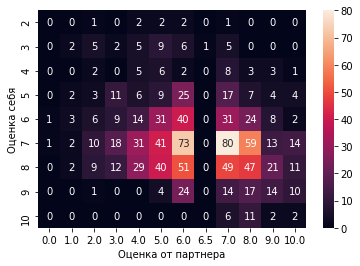

In [52]:
import seaborn as sns # библиотека для графиков

# # сохраним в новый датафрейм полученную таблицу
attract = df[['attractive', 'attractive_o']].value_counts().unstack().fillna(0) # заменим пустоты на 0

# # тепловая карта
s = sns.heatmap(attract, annot=True);
s.set(xlabel='Оценка от партнера', ylabel='Оценка себя');